## Bollinger_Breakout 策略

Buy： 价格突破UpperBand 和 Sigma<0.005

sell： b%>0.05

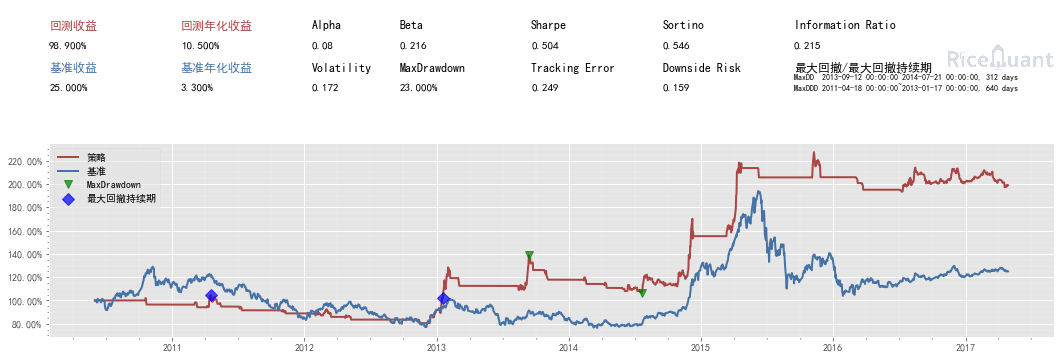

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2010-06-01  1210.24      98789.76                  1.000    100000.00   
  2010-06-02  1210.24      99271.08                  1.000    100481.32   
  2010-06-03  1210.24      98498.88                  1.005     99709.12   
  2010-06-04  1210.24      98798.04                  0.997    100008.28   
  2010-06-07  1210.24      97045.92                  1.000     98256.16   
  2010-06-08  1210.24      97176.24                  0.983     98386.48   
  2010-06-09  1210.24     100156.68                  0.984    101366.92   
  2010-06-10  1210.24      99000.72                  1.014    100210.96   
  2010-06-11  1210.24      99319.32                  1.002    100529.56   
  2010-06-17  1210.24      98738.28                  1.005     99948.52   
  2010-06-18  1210.24      97062.12                  0.999   

In [14]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 20
    context.stoploss = 0.98 #止损
    context.takepofit = 2 #止盈
    
def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoploss:# 现价低于原价一定比例
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takepofit:# 现价高于原价一定比例
            order_target_percent(stock,0)


def handle_bar(context, bar_dict):
    stop_loss(context, bar_dict)
    prices = history_bars(context.s1, context.PERIOD+2, '1d', 'close')
    upperband, middleband, lowerband = talib.BBANDS(prices, context.PERIOD)
    sigma = (upperband[-1]-prices[-1])/(2*prices[-1])


    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if sigma>0.05 and cur_position > 0:
        order_target_value(context.s1, 0)

    if prices[-2]<=upperband[-2] and prices[-1]>=upperband[-1] and sigma<0.005:
        order_shares(context.s1, shares)

"""

config = {
  "base": {
    "start_date": "2010-06-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

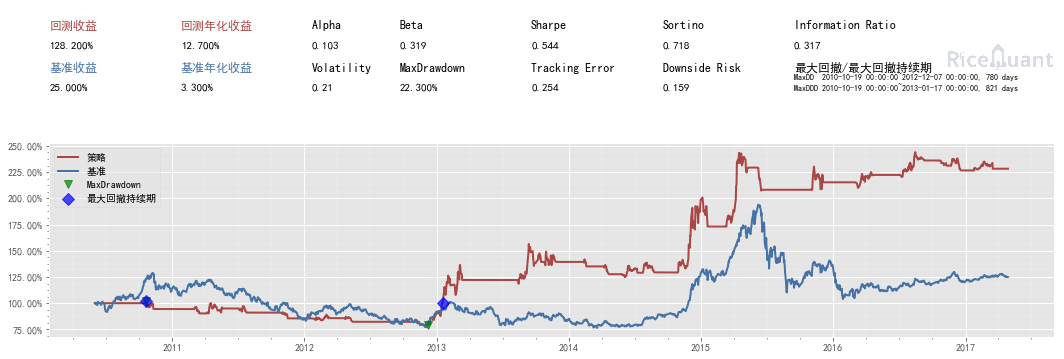

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2010-06-01  1210.24      98789.76                  1.000    100000.00   
  2010-06-02  1210.24      99271.08                  1.000    100481.32   
  2010-06-03  1210.24      98498.88                  1.005     99709.12   
  2010-06-04  1210.24      98798.04                  0.997    100008.28   
  2010-06-07  1210.24      97045.92                  1.000     98256.16   
  2010-06-08  1210.24      97176.24                  0.983     98386.48   
  2010-06-09  1210.24     100156.68                  0.984    101366.92   
  2010-06-10  1210.24      99000.72                  1.014    100210.96   
  2010-06-11  1210.24      99319.32                  1.002    100529.56   
  2010-06-17  1210.24      98738.28                  1.005     99948.52   
  2010-06-18  1210.24      97062.12                  0.999   

In [34]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 20

def handle_bar(context, bar_dict):
    prices = history_bars(context.s1, context.PERIOD+2, '1d', 'close')
    mom = talib.ROCR100(prices, context.PERIOD)
    upperband, middleband, lowerband = talib.BBANDS(prices, context.PERIOD)

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if mom[-1] < 100 and cur_position > 0:
        order_target_value(context.s1, 0)

    if mom[-1]>100 and prices[-2]<=upperband[-2] and prices[-1]>=upperband[-1]:
        order_shares(context.s1, shares)

"""

config = {
  "base": {
    "start_date": "2010-06-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

## 3. Bolling_Band策略
Buy: 短期Mom>长期Mom 和 价格下穿LowerBand再回穿LowerBand
Short: 短期Mom<长期Mom 或 价格上穿UpperBand再回穿UpperBand

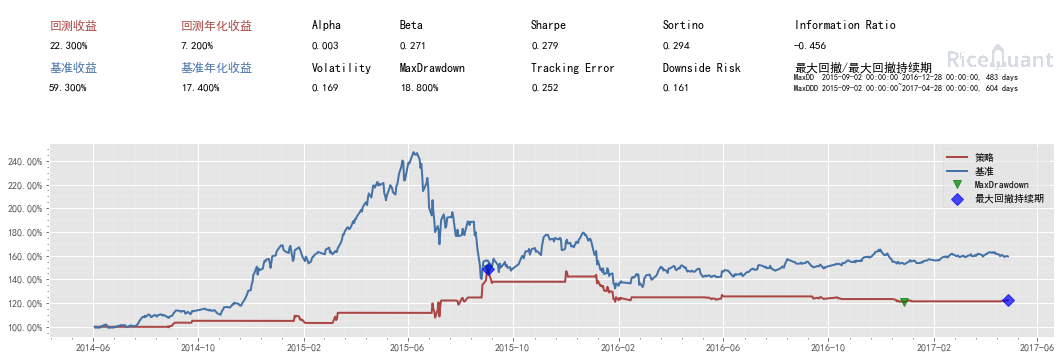

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2014-06-03  1103.68      98896.32                  1.000    100000.00   
  2014-06-04  1103.68      97900.42                  1.000     99004.10   
  2014-06-05  1103.68      98927.60                  0.990    100031.28   
  2014-06-06  1103.68      98197.12                  1.000     99300.80   
  2014-06-09  1103.68      98176.88                  0.993     99280.56   
  2014-06-10  1103.68      99418.42                  0.993    100522.10   
  2014-06-11  1103.68      99395.42                  1.005    100499.10   
  2014-06-12  1103.68      99056.86                  1.005    100160.54   
  2014-06-13  1103.68     100107.04                  1.002    101210.72   
  2014-06-16  1103.68     100825.56                  1.012    101929.24   
  2014-06-17  1103.68      99804.82                  1.019   

In [11]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 3
    context.LONGPERIOD = 10


def handle_bar(context, bar_dict):
    prices = history_bars(context.s1, context.LONGPERIOD+2, '1d', 'close')
    short_mom = talib.ROCR100(prices, context.SHORTPERIOD)
    long_mom = talib.ROCR100(prices, context.LONGPERIOD)
    upperband, middleband, lowerband = talib.BBANDS(prices, context.LONGPERIOD)

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if short_mom[-1] < long_mom[-1] and cur_position > 0:
        order_target_value(context.s1, 0)

    if short_mom[-1]>long_mom[-1] and prices[-2]<=lowerband[-2] and prices[-1]>=lowerband[-1]:
        order_shares(context.s1, shares)

"""

config = {
  "base": {
    "start_date": "2014-06-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)